* [Scotland's Aquaculture Map](http://aquaculture.scotland.gov.uk/map/map.aspx)
* [Shellfish results](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish/shellfish-results)
* [Safety and harvesting](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish)

https://twitter.com/FSScotBiotoxins

http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish

http://aquaculture.scotland.gov.uk/data/site_details.aspx

http://aquaculture.scotland.gov.uk/data/shellfish_species_area_classification.aspx

http://aquaculture.scotland.gov.uk/data/phytoplankton_monitoring_samples.aspx

In [35]:
%matplotlib inline

import os
import datetime
import requests
import pandas as pd
import dask.dataframe as dd

data_dir_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xlsx'
phytoplankton_start_str = 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report'
format_str_phytoplankton = phytoplankton_start_str + '_-_{}_-_{}_{}.xlsx'

# 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_{}_-_{}_{}_.xls'
e_coli_start_str = 'Shellfish_-_E._coli_-_Weekly_Result_Report'
format_str_e_coli = e_coli_start_str + '_-_{}_-_{}_{}_.xls'

# 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xls'
biotoxin_start_str = 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report'
format_str_biotoxin = biotoxin_start_str + '_-_{}_-_{}_{}.xls'

# Download files

http://www.foodstandards.gov.scot/publications-and-research/publications/shellfish-results-week-ending-03-august-2018



http://docs.python-requests.org/en/master/

In [20]:
def create_list_of_filenames(format_string):
    
    my_months = ['January'
             , 'February'
             ,'March'
             , 'April'
             , 'May'
             , 'June'
             , 'July'
             , 'August'
             , 'September'
             , 'October'
             , 'November'
             , 'December'
            ]

    list_of_filenames = []
    
    t = datetime.datetime(year=2018, month=1, day=1)
    for i in range(365):

        day = t.strftime('%d')
        month = my_months[t.month-1]
        year = t.year
        list_of_filenames.append(format_string.format(year, month, day))
        t = t + datetime.timedelta(days=1)
    return list_of_filenames

if False: 
    #list_of_filenames_phytoplankton = create_list_of_filenames('Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xlsx')
    list_of_filenames_phytoplankton = create_list_of_filenames(format_str_phytoplankton)

    #list_of_filenames_e_coli = create_list_of_filenames('Shellfish_-_E._coli_-_Weekly_Result_Report_-_{}_-_{}_{}_.xls')
    list_of_filenames_e_coli = create_list_of_filenames(format_str_e_coli)

    #list_of_filenames_biotoxin = create_list_of_filenames('Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xls')
    list_of_filenames_biotoxin = create_list_of_filenames(format_str_biotoxin)

In [ ]:
def url(filename):
    return 'http://www.foodstandards.gov.scot/downloads/' + filename

def filepath(filename):
    return os.path.join(data_dir_path, filename)
    
def filter_out_exiting_filesnames(list_of_filenames):
    new_filenames = []
    for filename in list_of_filenames:
        if os.path.exists(path):
            continue
        new_filenames.append(filename)
        
if False:
    list_of_filenames_phytoplankton = filter_out_exiting_filesnames(list_of_filenames_phytoplankton)
    list_of_filenames_e_coli = filter_out_exiting_filesnames(list_of_filenames_e_coli)
    list_of_filenames_biotoxin = filter_out_exiting_filesnames(list_of_filenames_biotoxin)

In [33]:
list_of_data_files = pd.DataFrame(os.listdir(data_dir_path), columns=['files'])

In [97]:
list_of_data_files_phytoplankton = list_of_data_files[list_of_data_files.files.str.startswith(phytoplankton_start_str)].copy()
list_of_data_files_e_coli = list_of_data_files[list_of_data_files.files.str.startswith(e_coli_start_str)].copy()
list_of_data_files_biotoxin = list_of_data_files[list_of_data_files.files.str.startswith(biotoxin_start_str)].copy()

In [132]:
def year(x):
    return int(x.split('.')[0].split('_')[-4])
def month(x):
    my_months_to_int = dict(zip(my_months, range(1,13)))
    return my_months_to_int[x.split('.')[0].split('_')[-2]]
def day(x):
    return int(x.split('.')[0].split('_')[-1])

def to_date(x):
    return datetime.date(year=year(x), month=month(x), day=day(x))

list_of_data_files_phytoplankton['date'] = list_of_data_files_phytoplankton['files'].apply(to_date)
list_of_data_files_biotoxin['date'] = list_of_data_files_biotoxin['files'].apply(to_date)

In [133]:
def year(x):
    return int(x.split('_')[-5])
def month(x):
    my_months_to_int = dict(zip(my_months, range(1,13)))
    return my_months_to_int[x.split('_')[-3]]
def day(x):
    return int(x.split('_')[-2])
def to_date(x):
    return datetime.date(year=year(x), month=month(x), day=day(x))

list_of_data_files_e_coli['date'] = list_of_data_files_e_coli['files'].apply(to_date)

In [23]:
def download_save_from_list(list_of_filenames):
    
    def download_save(url, path):
        
        r = requests.get(url, stream=True)

        if r.status_code == 200:
            with open(path, 'wb') as f:
                f.write(r.content)
        
    for filename in list_of_filenames:
        
        #url = 'http://www.foodstandards.gov.scot/downloads/' + filename
        url =  url(filename)
        path = filepath(filename)
        #if os.path.exists(path):
        #    continue

        download_save(url, path)

                print('.', end='')
if False:
    download_save_from_list(list_of_filenames_phytoplankton)
    download_save_from_list(list_of_filenames_e_coli)
    download_save_from_list(list_of_filenames_biotoxin)


KeyboardInterrupt: 

# Local filenames

## Campbeltown Loch - Shellfish Phytoplankton

In [4]:
filesnames_all = os.listdir(data_dir_path)

filesnames_shellfish = [f for f in filesnames_all if f.startswith('Shellfish')]

filenames_shellfish_phytoplankton = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_Phytoplankton_')]
filenames_shellfish_e_coli = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_E._coli_')]
filenames_shellfish_biotoxin = [f for f in filesnames_shellfish if f.startswith('Shellfish_-_Biotoxin_')]

header = ['Region'
     , 'Area'
     , 'Site'
     , 'Origin of Sample'
     , 'NGR'
     , 'SIN'
     , 'Sample'
     , 'Collected'
     , 'Received'
     , 'Analyzed'
     , 'Pseudo-nitzschia'
     , 'Alexandrium'
     , 'Dinophysis'
     , 'prorocentrum_lima'
     , 'prorocentrum_cordatum'
     , 'Lingulodinium'
     , 'Protoceratium']

header_pyhtoplanktons = header[10:]
header_pyhtoplanktons_trig = header[10:-3]
header_pyhtoplanktons_no_trig = header[-3:]

triggers = [50000, 40, 100, 100]

def read_pyhtoplankton_(data_dir_path):
    
    pyhtoplankton_list = []
    for f in filenames_shellfish_phytoplankton:

        phytoplankton_period = pd.read_excel(os.path.join(data_dir_path, f), skiprows=[0, 1, 2, 3], header=None)
        pyhtoplankton_list.append(phytoplankton_period)
        
    return pd.concat(pyhtoplankton_list)

    
def read_pyhtoplankton(header, data_dir_path):

    pyhtoplankton = read_pyhtoplankton_(data_dir_path)
        
    pyhtoplankton.columns = header
    
    pyhtoplankton['Region'] = pyhtoplankton.Region.fillna(method='ffill')
    pyhtoplankton['Collected'] = pd.to_datetime(pyhtoplankton['Collected'])
    return pyhtoplankton

pyhtoplankton = read_pyhtoplankton(header=header, data_dir_path=data_dir_path)

def select_area(area, pyhtoplankton):

    pyhtoplankton_area = pyhtoplankton[pyhtoplankton['Area']==area]
    pyhtoplankton_area = pyhtoplankton_area.set_index('Collected')
    
    return pyhtoplankton_area
    
pyhtoplankton_ct = select_area('Campbeltown Loch', pyhtoplankton)

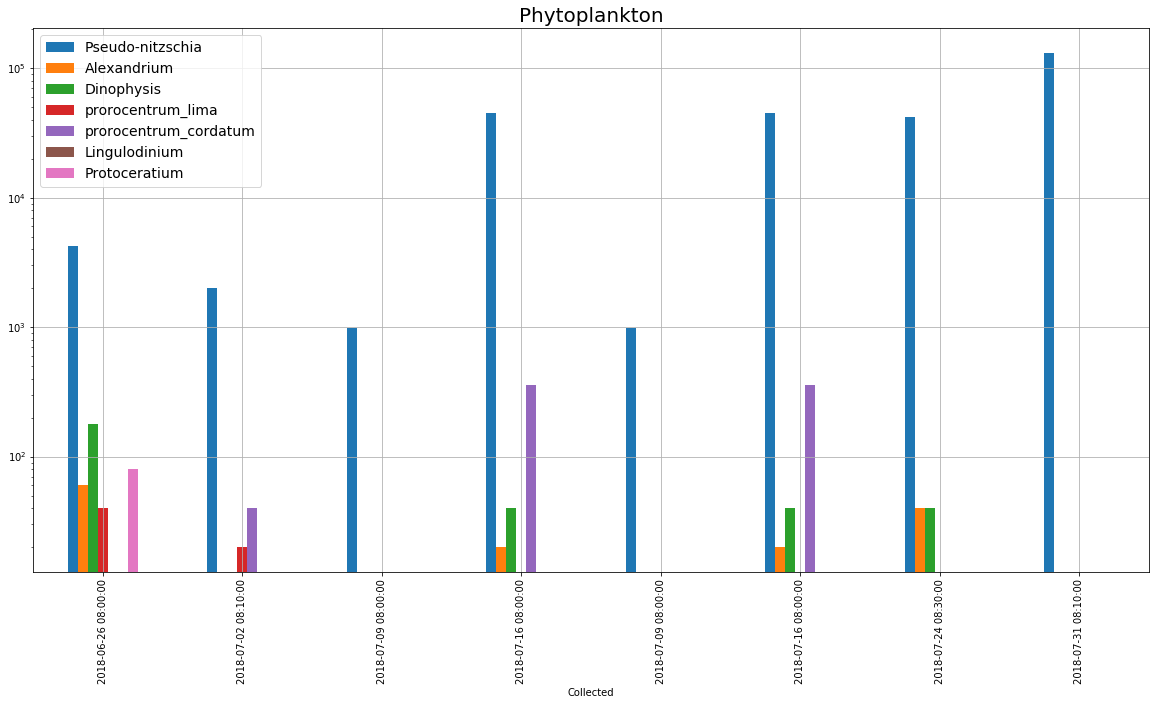

In [5]:
def plot_pyhtoplankton(pyhtoplankton):
    ax = pyhtoplankton.plot.bar(y=header_pyhtoplanktons, figsize=(20, 10), grid=True, logy=True, label=False)
    ax.legend(loc=0, fontsize=14)
    ax.set_title(label="Phytoplankton", fontsize=20)
    
plot_pyhtoplankton(pyhtoplankton_ct)

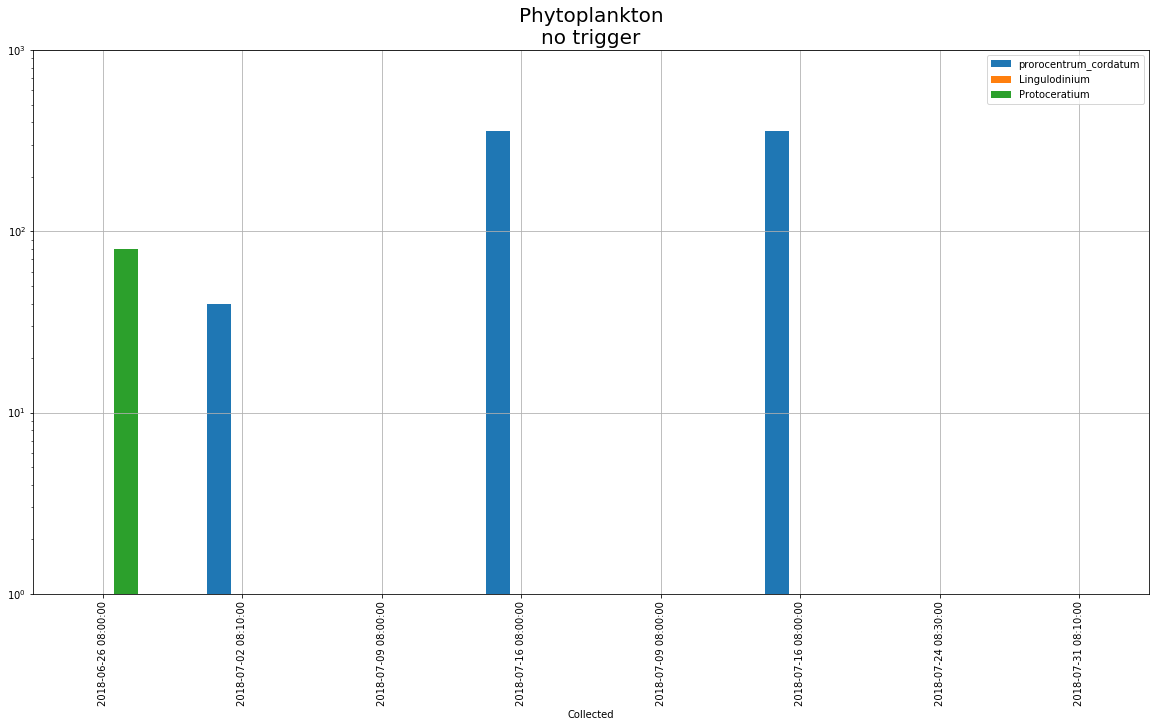

In [6]:
def plot_pyhtoplankton_no_trig(pyhtoplankton, header_pyhtoplanktons_no_trig):
    pyhtoplankton_no_trig = pyhtoplankton[header_pyhtoplanktons_no_trig]
    ax = pyhtoplankton_no_trig.plot.bar(figsize=(20, 10), grid=True, logy=True, ylim=(1, 1000))
    ax.set_title(label="Phytoplankton\nno trigger", fontsize=20)
    
plot_pyhtoplankton_no_trig(pyhtoplankton_ct, header_pyhtoplanktons_no_trig)

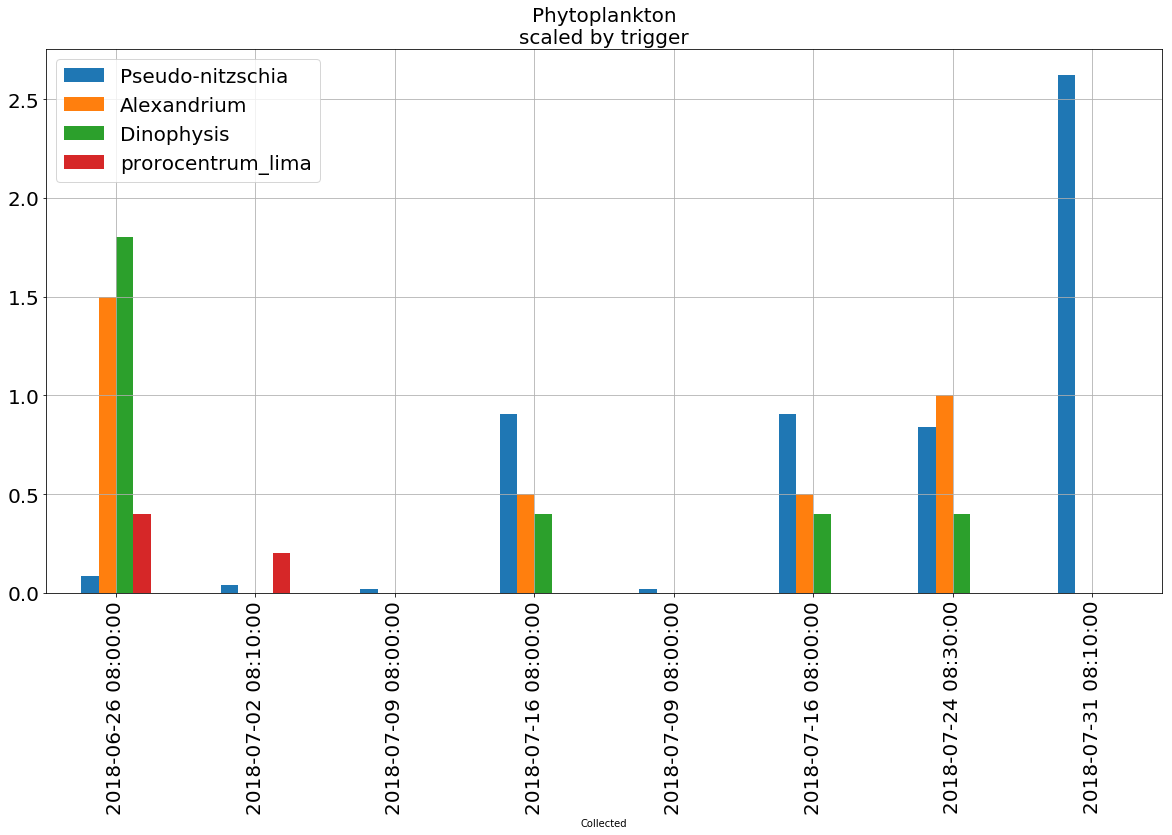

In [7]:
def plot_pyhtoplankton_trig(pyhtoplankton, header_pyhtoplanktons_trig):
    pyhtoplankton_ct_trig = pyhtoplankton[header_pyhtoplanktons_trig]
    pyhtoplankton_ct_trig_norm = pyhtoplankton_ct_trig / triggers
    
    ax  = pyhtoplankton_ct_trig_norm.plot.bar(figsize=(20, 10)
                                      , grid=True
                                      , fontsize=20)

    ax.set_title(label="Phytoplankton\nscaled by trigger", fontsize=20)
    ax.legend(fontsize=20, loc=0)

plot_pyhtoplankton_trig(pyhtoplankton_ct, header_pyhtoplanktons_trig)

# E. Coli


In [8]:
def read_e_coli_():

    e_coli_list = []
    for f in filenames_shellfish_e_coli:
        e_coli_list.append(
            pd.read_excel(os.path.join(data_dir_path
        , f))
        )

    return pd.concat(e_coli_list)

def read_e_coli():
    e_coli = read_e_coli_()
    e_coli['Collection Date'] = pd.to_datetime(e_coli['Collection Date'])
    e_coli = e_coli.set_index('Collection Date')
    return e_coli

e_coli = read_e_coli()

def e_coli_select_area(e_coli):
    return e_coli[e_coli['Production Area'] == 'Loch na Cille']
    
e_coli_ct = e_coli_select_area(e_coli)

In [9]:
e_coli_ct.columns

Index(['Sample number', 'Site SIN Number', 'Local Authority',
       'Production Area', 'Site Name', 'SIN', 'Sample For Fast Track',
       'Sample Species', 'OS Grid Reference', 'Water Temp', 'Sample Source',
       'Lab Received Date', 'Arrival Temp', 'Test Date', 'Ecoli/100g',
       'Result Classification', 'Current Area Classification', 'UKAS No',
       'Investigative/Resample', 'Date reported to FSA', 'Sample Rejected',
       'Sample rejected reason', 'Improbable combination',
       'Improbable combination value', 'Harvester's Own Results'],
      dtype='object')

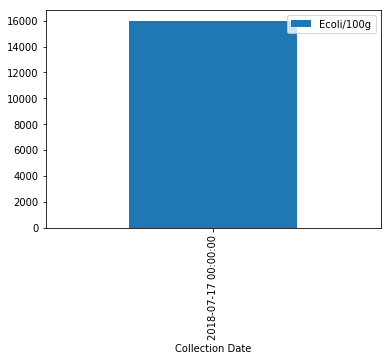

In [10]:
e_coli_ct.plot.bar(y=['Ecoli/100g'])

In [11]:
e_coli_ct.iloc[0]

Sample number                                   18/1021
Site SIN Number                          AB 617 1204 04
Local Authority                 Argyll and Bute Council
Production Area                           Loch na Cille
Site Name                         Loch na Cille Cockles
SIN                                      AB 617 1204 04
Sample For Fast Track                             False
Sample Species                           Common cockles
OS Grid Reference                         NM84146 12537
Water Temp                                         16.9
Sample Source                                hand raked
Lab Received Date                   2018-07-18 00:00:00
Arrival Temp                                        2.7
Test Date                           2018-07-18 00:00:00
Ecoli/100g                                        16000
Result Classification                                 C
Current Area Classification                           C
UKAS No                                         

# Biotoxin

[Biotoxins are substances which are both toxic and have a biological origin. ](http://www.biosciences-labs.bham.ac.uk/exhibit/whatare.html)

In [12]:
def read_biotoxin_():
    biotoxin_list = []
    for f in filenames_shellfish_biotoxin:
        biotoxin_list.append(pd.read_excel(os.path.join(data_dir_path, f)))
    return pd.concat(biotoxin_list)

def read_biotoxin():
    biotoxin = read_biotoxin_()
    biotoxin['Date Collected'] = pd.to_datetime(biotoxin['Date Collected']) 
    biotoxin = biotoxin.set_index('Date Collected')
    #biotoxin = biotoxin.fillna(0)
    return biotoxin

biotoxin = read_biotoxin()

def biotoxin_select_area(biotoxin, area):

    biotoxin_ct = biotoxin[biotoxin['Production Area'] == area]
    biotoxin_ct = biotoxin_ct.sort_index()
    
    return biotoxin_ct
    
biotoxin_ct = biotoxin_select_area(biotoxin, 'Loch na Cille')

In [13]:
biotoxin_ct['Species']

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [14]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400']

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [15]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Quant_highvalue_result']

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [16]:
biotoxin_ct.iloc[:, 8]

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [17]:
biotoxin_ct.iloc[:, 9]

Date Collected
2018-06-27    Detected
2018-07-02          ND
2018-07-11    Detected
2018-07-11    Detected
2018-07-17         NaN
2018-07-17         NaN
2018-07-22         NaN
2018-07-30    Detected
Name: PSPScreenbyHPLC_ND-DETECTED, dtype: object

In [18]:
biotoxin_ct.iloc[:, 10]

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [19]:
biotoxin_ct.iloc[:, 12]

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [20]:
biotoxin_ct.iloc[:, 14]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: PSP_by_MBA_(µg STXeq/kg), dtype: float64

In [21]:
biotoxin_ct.iloc[:, 16]

Date Collected
2018-06-27     92
2018-07-02     60
2018-07-11     64
2018-07-11     64
2018-07-17    169
2018-07-17    169
2018-07-22    122
2018-07-30    181
Name: Total OA/DTXs/PTXs (µg OA eq/kg) - HIGH value result, dtype: object

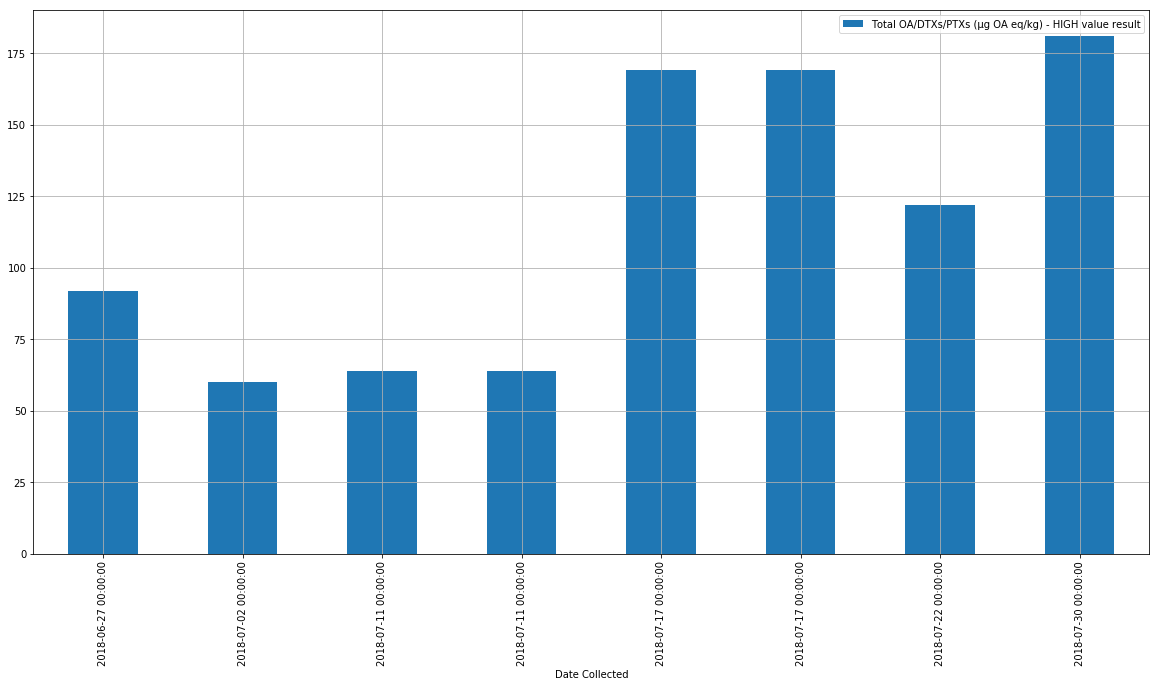

In [22]:
pd.DataFrame(biotoxin_ct.iloc[:, 16]).plot.bar(figsize=(20, 10), grid=True)

In [23]:
biotoxin_ct.iloc[:, 17]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    <RL
2018-07-17    <RL
2018-07-22    <RL
2018-07-30    <RL
Name: Total AZAs (µg AZA1 eq/kg) - HIGH value result, dtype: object

In [24]:
biotoxin_ct.iloc[:, 18]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    0.1
2018-07-11    0.1
2018-07-17      1
2018-07-17      1
2018-07-22    0.2
2018-07-30    0.3
Name: Total YTXs (mg YTX eq/kg) - HIGH value result, dtype: object

In [25]:
biotoxin_ct.iloc[:, 20]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: DSP BY MBA_NG-PS, dtype: float64

In [26]:
biotoxin_ct.iloc[:, 22]

Date Collected
2018-06-27     NaN
2018-07-02    <LOQ
2018-07-11     NaN
2018-07-11     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <LOQ
Name: ASP\n(mg /kg) , dtype: object

# Map

http://geo.holoviews.org/Working_with_Bokeh.html

https://scipython.com/book/chapter-2-the-core-python-language-i/additional-problems/converting-between-an-os-grid-reference-and-longitudelatitude/

https://stackoverflow.com/questions/39117276/python-to-convert-map-reference-to-latitude-longitude

http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

In [7]:
# http://geo.holoviews.org/Working_with_Bokeh.html

import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')

AttributeError: module 'numpy' has no attribute '__version__'